encoding numerical features

to create bins to represent the range of numerical numbers it is problem specific

it helps to handle outliers 

to improve the value spread

In [2]:
print("radha")

radha


In [3]:
import numpy as np;

In [8]:
score = [35, 42, 28, 61, 75, 39, 55,40]
threshold = 40;
binarized_score = np.where(np.array(score) >= threshold,1,0)

for score, binary in zip(score,binarized_score):
    print(f"Score: {score} => Result: {binary} ")

Score: 35 => Result: 0 
Score: 42 => Result: 1 
Score: 28 => Result: 0 
Score: 61 => Result: 1 
Score: 75 => Result: 1 
Score: 39 => Result: 0 
Score: 55 => Result: 1 
Score: 40 => Result: 1 


## **Binning**


In [9]:
import pandas as pd;


In [17]:
df = pd.read_csv('train.csv', usecols=['Age' , 'Fare', 'Survived']);
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df.shape

(891, 3)

In [20]:
print(891-177)
df.isnull().sum()


714


Survived      0
Age         177
Fare          0
dtype: int64

In [21]:
df.dropna(inplace=True); # remove missing values
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [23]:
df.shape

(714, 3)

In [28]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [39]:
round(accuracy_score(y_test,y_pred)*100,2)

63.64

In [47]:
from sklearn.model_selection import cross_val_score
print(round(cross_val_score(DecisionTreeClassifier(),X,y,cv=10, scoring='accuracy').mean()*100,2))

63.31


# **applying discretizer**

In [48]:

from sklearn.preprocessing import KBinsDiscretizer

In [49]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [52]:
from sklearn.compose import ColumnTransformer

In [53]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [54]:
trf = ColumnTransformer([
    ('trf1',kbin_age,[0]),
    ('trf2',kbin_fare,[1]),
])

In [57]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\pr

In [68]:
trf.named_transformers_.trf1.bin_edges_

array([array([ 1. , 11. , 17. , 20.6, 24. , 28. , 30.1, 34.4, 38.6, 47.8, 62. ])],
      dtype=object)

In [71]:
output = pd.DataFrame({
    'age':X_train.Age,
    'age_trf':X_train_trf[:,0],
    'fare':X_train.Fare,
    'fare_trf':X_train_trf[:,1],
})

In [96]:
output['Age Labels'] =pd.cut(x=X_train['Age'] , bins=trf.named_transformers_.trf1.bin_edges_[0].tolist())
output['Fare Labels'] =pd.cut(x=X_train['Fare'] , bins=trf.named_transformers_.trf2.bin_edges_[0].tolist())

In [103]:
output.head()

,age,age_trf,fare,fare_trf,Age Labels,Fare Labels
328,31.0,5.0,20.5250,5.0,"(30.1, 34.4]","(14.454, 22.62]"
73,26.0,4.0,14.4542,4.0,"(24.0, 28.0]","(10.5, 14.454]"
253,30.0,5.0,16.1000,5.0,"(28.0, 30.1]","(14.454, 22.62]"
719,33.0,6.0,7.7750,1.0,"(30.1, 34.4]","(7.743, 7.925]"
666,25.0,4.0,13.0000,4.0,"(24.0, 28.0]","(10.5, 14.454]"


In [105]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [107]:
y_pred2 = clf.predict(X_test_trf)
round(accuracy_score(y_test,y_pred2)*100,2)

68.53

In [109]:
round(cross_val_score(DecisionTreeClassifier(),X_train_trf,y_train,cv=10, scoring='accuracy').mean()*100,2)

np.float64(67.78)

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
def descretize(strategy , bins):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('trf1',kbin_age,[0]),
        ('trf2',kbin_fare,[1]),
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10, scoring='accuracy'))*100)

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X["Age"])
    plt.title(f'Age Distribution - {strategy} , before Binning')

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title(f'Age Distribution - {strategy} , after Binning')

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X["Fare"])
    plt.title(f'Fare Distribution - {strategy} , before Binning')
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title(f'Fare Distribution - {strategy} , after Binning')

    plt.show()


c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


68.2140062597809


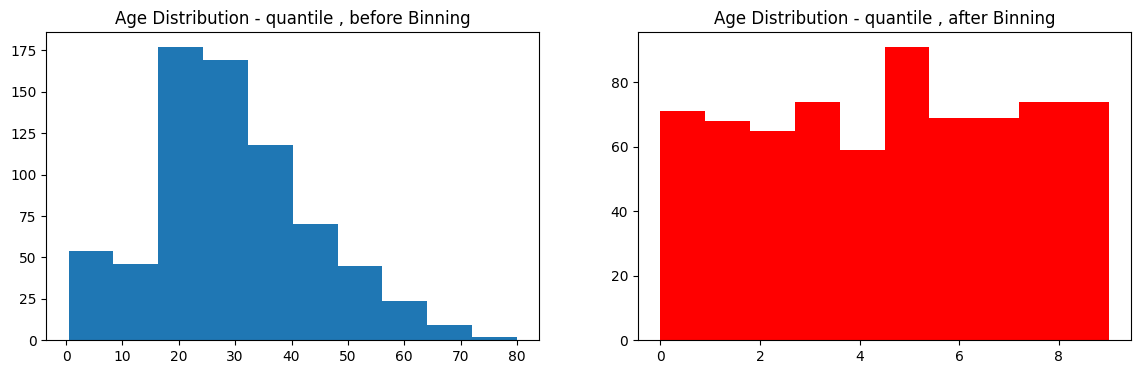

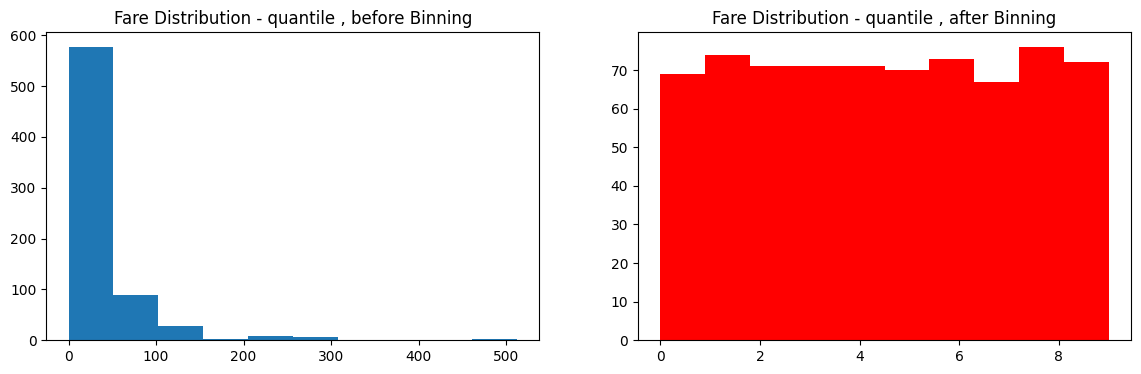

In [123]:
descretize(strategy='quantile', bins=10)

68.64632237871675


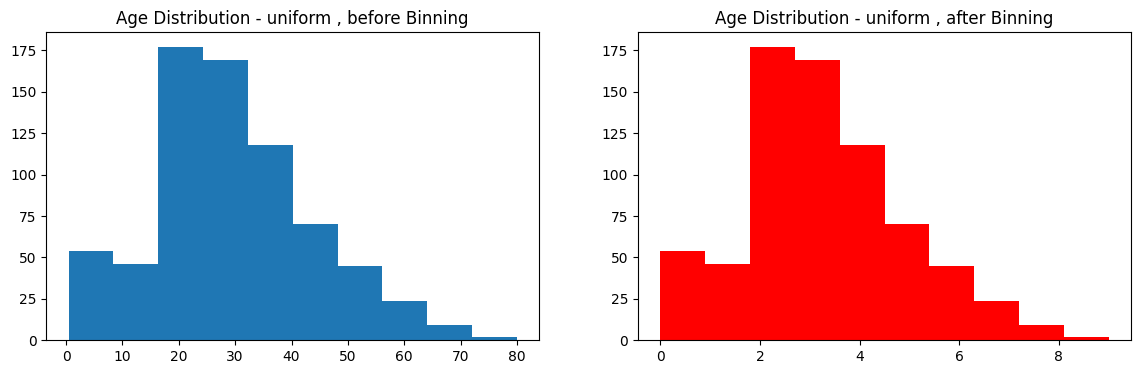

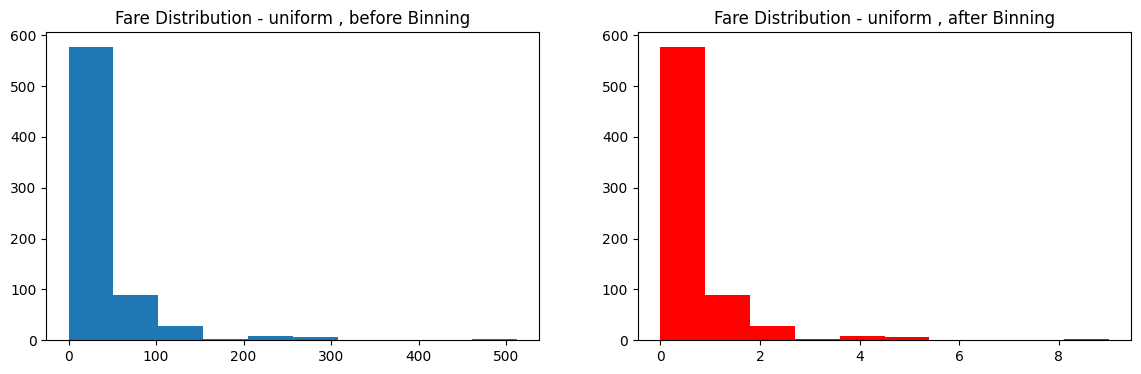

In [124]:
descretize(strategy='uniform', bins=10)

65.84702660406886


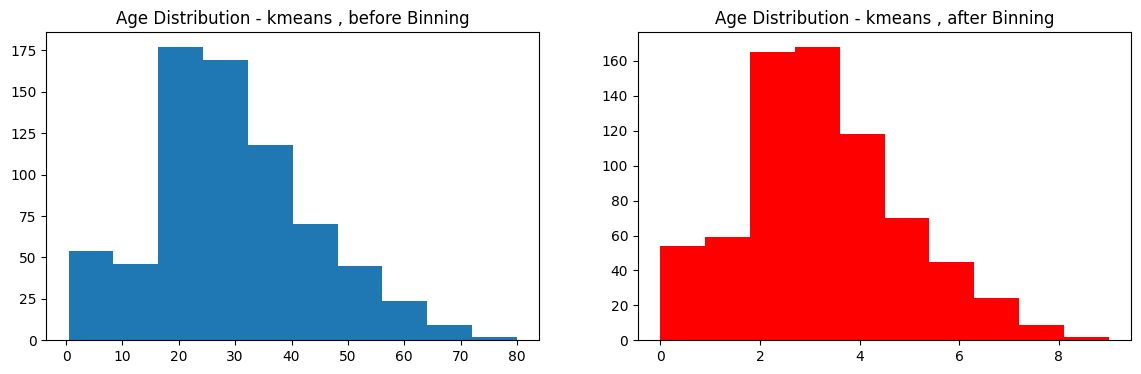

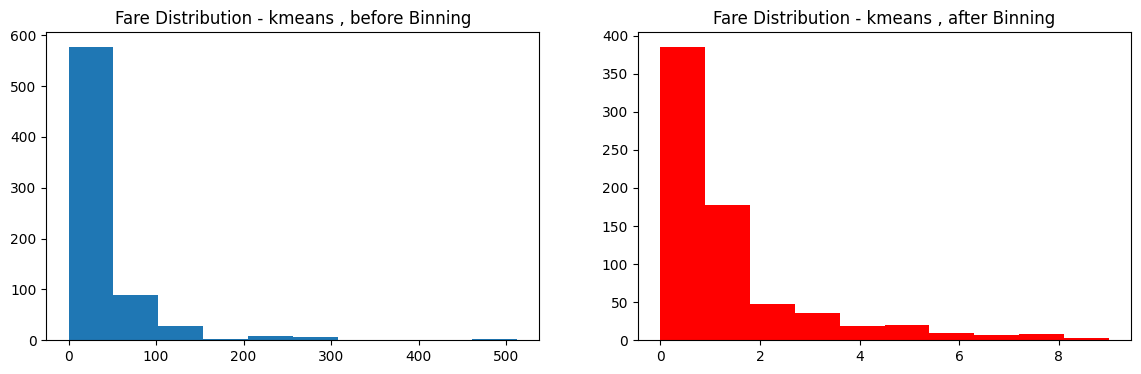

In [125]:
descretize(strategy='kmeans', bins=10)